# Data Sources

### [NYC Open Data: 311 Service Requests from 2010 to Present](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9)
<b>Access instructions:</b> Request via Socrata Open Data API (see first code cell below)

### [NYC Planning Community District Profiles](https://communityprofiles.planning.nyc.gov/)
<b>Access instructions:</b> Navigate to any district profile, click on "indicators" tab under the district name, scroll down to "Resources" -> "Download the Data" -> "Indicators Data". The CSV file contains indicators for all community districts, with chosen community district in first row.

# Loading, Merging, and Previewing the Data

In [373]:
#get 100k most recent 311 service requests 

import pandas as pd
from sodapy import Socrata

client = Socrata("data.cityofnewyork.us", None)

client.timeout = 1000
results = client.get("erm2-nwe9", limit=10**5)


In [374]:
df = pd.DataFrame.from_records(results)

In [391]:
#eliminate rows without lat/long data
df = df[df.latitude.notnull()]
df = df[df.longitude.notnull()]

In [377]:
len(df)

97584

In [378]:
#exclude unnecessary columns
df = df[['created_date', 'agency', 'agency_name', 'complaint_type',
       'descriptor', 'community_board', 'borough', 'latitude', 'longitude',
       'location_type', 'status']]

In [379]:
df.head()

,created_date,agency,agency_name,complaint_type,descriptor,community_board,borough,latitude,longitude,location_type,status
0,2020-11-09T02:22:47.000,DOT,Department of Transportation,Street Condition,Pothole,17 BROOKLYN,BROOKLYN,40.63535077558057,-73.937351758285,NaN,Open
1,2020-11-09T02:02:23.000,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,01 BRONX,BRONX,40.79990534437899,-73.90952638674354,Street/Sidewalk,In Progress
2,2020-11-09T02:02:12.000,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,01 STATEN ISLAND,STATEN ISLAND,40.6318871589743,-74.12335171974455,Street/Sidewalk,In Progress
3,2020-11-09T02:02:12.000,MAYORâS OFFICE OF SPECIAL ENFORCEMENT,Mayorâs Office of Special Enforcement,NonCompliance with Phased Reopening,Business not in compliance,03 QUEENS,QUEENS,40.74977699807143,-73.86371495401673,Store/Commercial,In Progress
4,2020-11-09T02:02:00.000,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,06 BRONX,BRONX,40.84759560547517,-73.90048682740657,Store/Commercial,In Progress


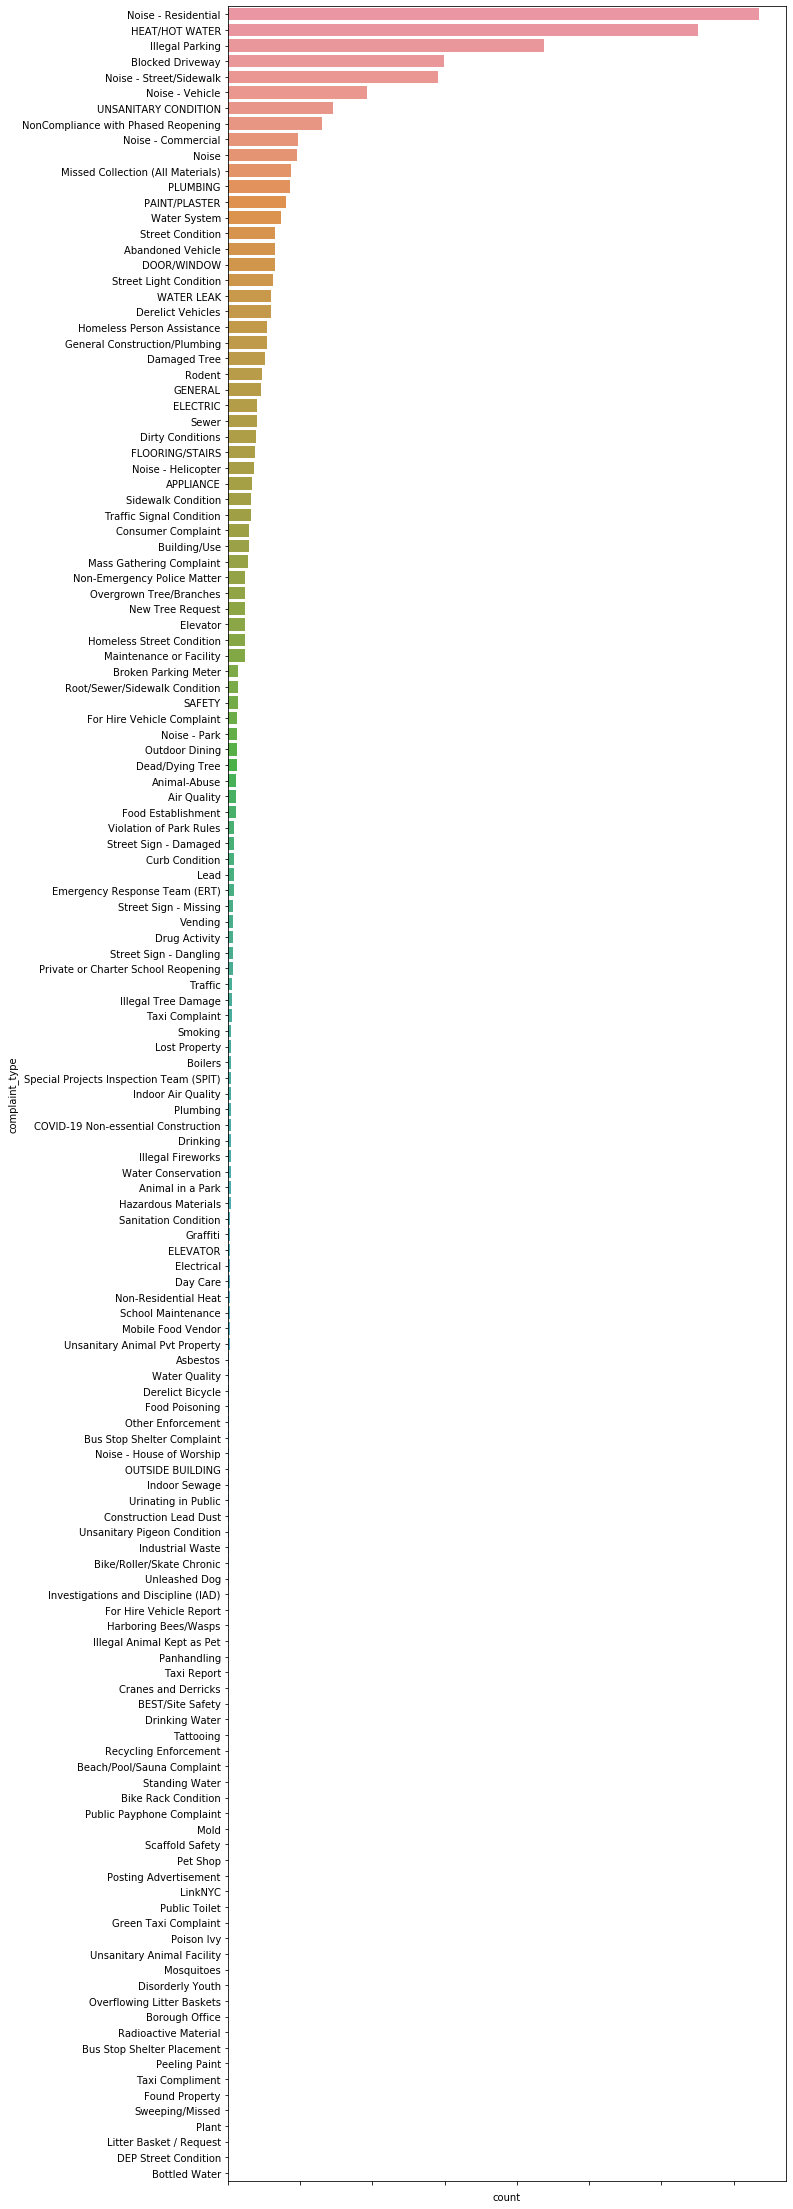

In [380]:
#see distribution of complaint types
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,40))
ax = sns.countplot(y="complaint_type", data=df, order = df["complaint_type"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

In [381]:
#read in and preview indicators data
indicators = pd.read_csv('indicators.csv')

In [382]:
indicators.head()

,the_geom,cartodb_id,the_geom_webmercator,acres,acs_tooltip,acs_tooltip_2,acs_tooltip_3,area_sqmi,borocd,cb_email,...,under18_rate,under18_rate_boro,under18_rate_nyc,unemployment_boro,unemployment,unemployment_nyc,v_pluto,v_acs,v_facdb,v_crime
0,NaN,1,NaN,976.3,American Community Survey 2014-2018 5-Year Est...,American Community Survey (ACS) 2013-2017 5-ye...,2010 Census population counts for floodplain a...,1.5,101,man01@cb.nyc.gov,...,12.7,14.4,20.9,3.8,2.8,4.4,20v4,Y2014-2018,6/24/20,2019
1,NaN,2,NaN,865.9,American Community Survey 2014-2018 5-Year Est...,American Community Survey (ACS) 2013-2017 5-ye...,2010 Census population counts for floodplain a...,1.4,102,bgormley@cb.nyc.gov,...,12.7,14.4,20.9,3.8,2.8,4.4,20v4,Y2014-2018,6/24/20,2019
2,NaN,3,NaN,1076.9,American Community Survey 2014-2018 5-Year Est...,American Community Survey (ACS) 2013-2017 5-ye...,2010 Census population counts for floodplain a...,1.7,103,mn03@cb.nyc.gov,...,11.4,14.4,20.9,3.8,3.6,4.4,20v4,Y2014-2018,6/24/20,2019
3,NaN,4,NaN,1131.6,American Community Survey 2014-2018 5-Year Est...,American Community Survey (ACS) 2013-2017 5-ye...,2010 Census population counts for floodplain a...,1.8,104,jbodine@cb.nyc.gov,...,8.2,14.4,20.9,3.8,3.5,4.4,20v4,Y2014-2018,6/24/20,2019
4,NaN,5,NaN,1005.4,American Community Survey 2014-2018 5-Year Est...,American Community Survey (ACS) 2013-2017 5-ye...,2010 Census population counts for floodplain a...,1.6,105,office@cb5.org,...,8.2,14.4,20.9,3.8,3.5,4.4,20v4,Y2014-2018,6/24/20,2019


In [383]:
#exclude unnecessary columns in new dataframe
ind_df = indicators[
['cd_short_title', 
 'area_sqmi',
'count_hosp_clinic',
'count_libraries',
'count_parks',
'count_public_schools',
'crime_per_1000',
'female_10_14',
'female_15_19',
'female_20_24',
'female_25_29',
'female_30_34',
'female_35_39',
'female_40_44',
'female_45_49',
'female_5_9',
'female_50_54',
'female_55_59',
'female_60_64',
'female_65_69',
'female_70_74',
'female_75_79',
'female_80_84',
'female_85_over',
'female_under_5', 
'male_10_14',
'male_15_19',
'male_20_24',
'male_25_29',
'male_30_34',
'male_35_39',
'male_40_44',
'male_45_49',
'male_5_9',
'male_50_54',
'male_55_59',
'male_60_64',
'male_65_69',
'male_70_74',
'male_75_79',
'male_80_84',
'male_85_over',
'male_under_5',
'under18_rate',
'over65_rate',
'lots_total',
'lots_vacant',
'pct_white_nh',
'pct_black_nh',
'pct_asian_nh',
'pct_other_nh',
'pct_hispanic',
'mean_commute',
'pop_change_00_10',
'pct_clean_strts',
'unemployment',
'poverty_rate',
'lep_rate_boro',
 'pct_hh_rent_burd'
]]

In [384]:
#format community district string values so that they match community board values 
#(In NYC, community districts and their corresponding boards share the same number and borough.)

pd.options.mode.chained_assignment = None 

for row in ind_df.index:
    upper = ind_df.at[row, "cd_short_title"].upper().replace(' CD','')
    num_first = "{}".format(upper[-2:] + ' ' + upper[:-2]).strip()
    ind_df.cd_short_title.loc[row] = num_first

In [385]:
for row in df.community_board.index:
    string = df.community_board[row]
    if string.startswith('0'):
        df.community_board.loc[row] = string[1:]

In [395]:
#confirm matched format
print(df.community_board.head(10))
print(ind_df.cd_short_title.head(10))

0        17 BROOKLYN
1            1 BRONX
2    1 STATEN ISLAND
3           3 QUEENS
4            6 BRONX
5       11 MANHATTAN
6        3 MANHATTAN
7           2 QUEENS
8           7 QUEENS
9           12 BRONX
Name: community_board, dtype: object
0     1 MANHATTAN
1     2 MANHATTAN
2     3 MANHATTAN
3     4 MANHATTAN
4     5 MANHATTAN
5     6 MANHATTAN
6     7 MANHATTAN
7     8 MANHATTAN
8     9 MANHATTAN
9    10 MANHATTAN
Name: cd_short_title, dtype: object


In [386]:
#eliminate rows without a match
for i in df.community_board:
    if i not in ind_df.cd_short_title.unique():
        df = df[df.community_board != i]

In [387]:
#create new column with matching name to join data
ind_df['community_board'] = ind_df.cd_short_title
df_final = pd.merge(df, ind_df, how='inner')

In [389]:
#preview final data
df_final

,created_date,agency,agency_name,complaint_type,descriptor,community_board,borough,latitude,longitude,location_type,...,pct_asian_nh,pct_other_nh,pct_hispanic,mean_commute,pop_change_00_10,pct_clean_strts,unemployment,poverty_rate,lep_rate_boro,pct_hh_rent_burd
0,2020-11-09T02:22:47.000,DOT,Department of Transportation,Street Condition,Pothole,17 BROOKLYN,BROOKLYN,40.63535077558057,-73.937351758285,NaN,...,1.3,1.8,7.6,47.4,-0.06,94.2,4.3,19.5,23.6,48.5
1,2020-11-09T01:35:25.000,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,17 BROOKLYN,BROOKLYN,40.66062435671752,-73.92735125300926,Street/Sidewalk,...,1.3,1.8,7.6,47.4,-0.06,94.2,4.3,19.5,23.6,48.5
2,2020-11-09T01:34:24.000,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Traffic,17 BROOKLYN,BROOKLYN,40.66050077333729,-73.92724325806617,Street/Sidewalk,...,1.3,1.8,7.6,47.4,-0.06,94.2,4.3,19.5,23.6,48.5
3,2020-11-09T00:00:30.000,NYPD,New York City Police Department,Noise - Residential,Loud Talking,17 BROOKLYN,BROOKLYN,40.651693851793,-73.94387378038995,Residential Building/House,...,1.3,1.8,7.6,47.4,-0.06,94.2,4.3,19.5,23.6,48.5
4,2020-11-08T23:47:14.000,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,17 BROOKLYN,BROOKLYN,40.63639263348162,-73.94587551416203,Residential Building/House,...,1.3,1.8,7.6,47.4,-0.06,94.2,4.3,19.5,23.6,48.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97079,2020-10-26T15:32:01.000,DOB,Department of Buildings,Building/Use,Illegal Conversion Of Residential Building/Space,14 QUEENS,QUEENS,40.599572668185026,-73.76421523730716,NaN,...,3.8,2.3,23.9,51.1,0.08,96.3,5.1,17.2,28.8,42.0
97080,2020-10-26T15:12:51.000,DPR,Department of Parks and Recreation,Illegal Tree Damage,Branches Damaged,14 QUEENS,QUEENS,40.57720798199081,-73.8449051998697,Street,...,3.8,2.3,23.9,51.1,0.08,96.3,5.1,17.2,28.8,42.0
97081,2020-10-26T14:49:15.000,NYPD,New York City Police Department,Blocked Driveway,Partial Access,14 QUEENS,QUEENS,40.59955591971331,-73.75618857807719,NaN,...,3.8,2.3,23.9,51.1,0.08,96.3,5.1,17.2,28.8,42.0
97082,2020-10-26T14:23:27.000,MAYORâS OFFICE OF SPECIAL ENFORCEMENT,Mayorâs Office of Special Enforcement,NonCompliance with Phased Reopening,Restaurant/Bar Not in Compliance,14 QUEENS,QUEENS,40.584896624413986,-73.81893679404803,Store/Commercial,...,3.8,2.3,23.9,51.1,0.08,96.3,5.1,17.2,28.8,42.0


In [390]:
#see date range
df_final.created_date.unique()

array(['2020-11-09T02:22:47.000', '2020-11-09T01:35:25.000',
       '2020-11-09T01:34:24.000', ..., '2020-10-26T15:12:51.000',
       '2020-10-26T14:23:27.000', '2020-10-26T14:16:04.000'], dtype=object)